# Titanic Survival Prediction

## Importing Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Loading Data

In [89]:
# training dataset
url = 'https://raw.githubusercontent.com/Anvit28/Titanic-Survival-Prediction/main/train.csv'
train = pd.read_csv(url)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
# test dataset
url = 'https://raw.githubusercontent.com/Anvit28/Titanic-Survival-Prediction/main/test.csv'
test = pd.read_csv(url)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Describing the Data

Features available in the dataset-

In [4]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
# preview the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Categorical features:** Survived, Sex, and Embarked.  
**Ordinal features:** Pclass.  
**Continous features:** Age, Fare.   
**Discrete features:** SibSp, Parch.  

In [7]:
# Information about features
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

We can see that:-


*   Seven features are integer or floats. Six in case of test dataset.
*   Five features are strings (object).
*   Cabin > Age > Embarked features contain null values in that order for the training dataset.
*   Cabin > Age features contain null values in that order for the training dataset.





In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that-
* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

In [18]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


We can see that-
* Names are unique across the dataset (count=unique=891).
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

## Feature Selection

We want to know how well does each feature correlate with Survival.

**1) Age**

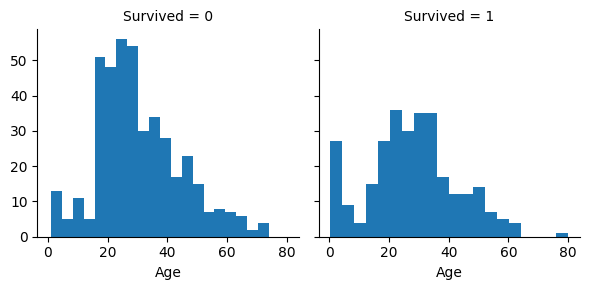

In [9]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

We can see that-  
* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.  

As a result, we consider Age in our model training.

**2) Pclass with Age**

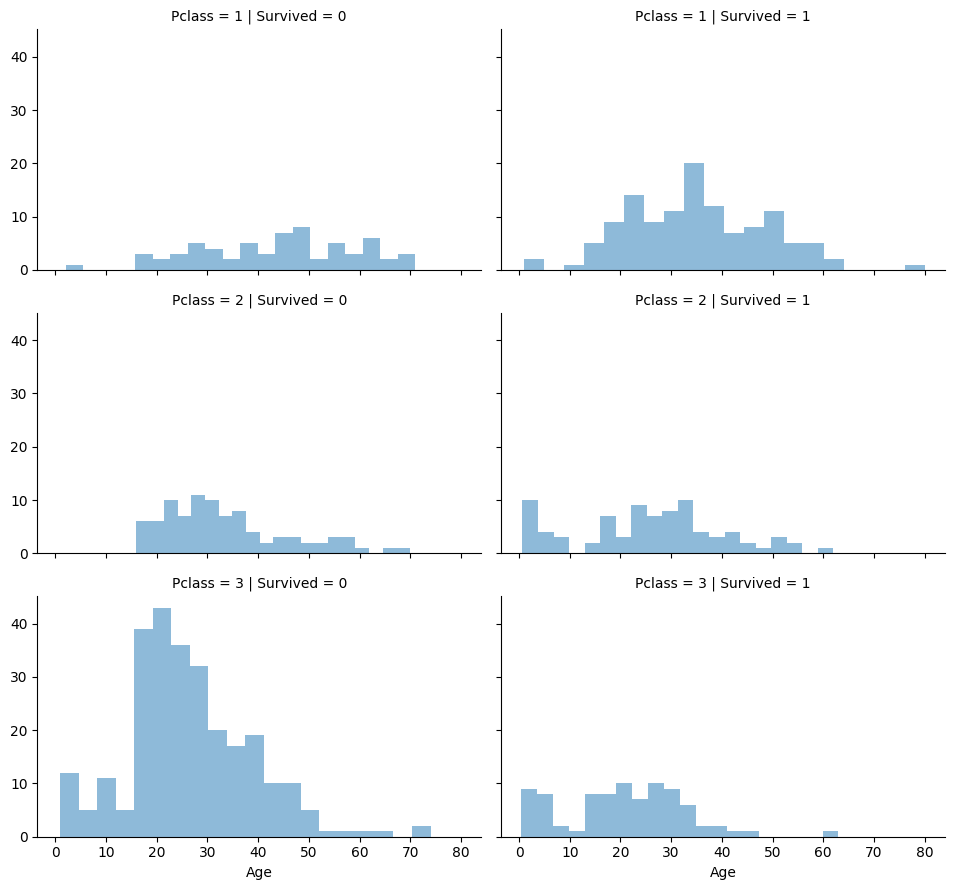

In [11]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

We can see that-  
* Pclass=3 had most passengers, however most did not survive.  
* Infant passengers in Pclass=2 and Pclass=3 mostly survived.  
* Most passengers in Pclass=1 survived.  

Thus, we can see that Pclass varies in terms of Age distribution of passengers. As a result, we consider Pclass for model training.  

**3) Sex**

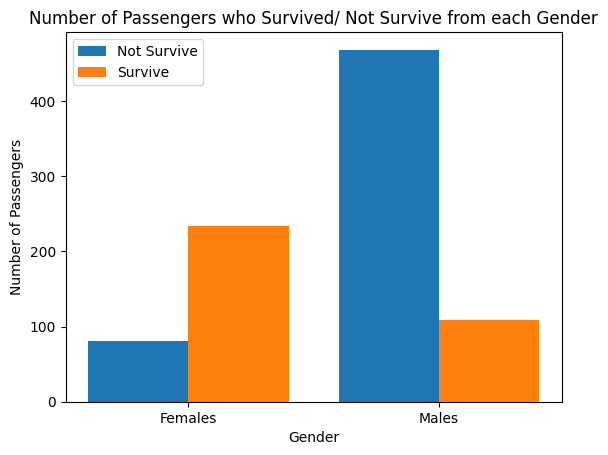

In [16]:
df2=train.groupby(['Sex','Survived'])['Survived'].count()
X = ['Females','Males']
not_survive = [df2.iloc[0],df2.iloc[2]]
survive = [df2.iloc[1],df2.iloc[3]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, not_survive, 0.4, label = 'Not Survive')
plt.bar(X_axis + 0.2, survive, 0.4, label = 'Survive')
  
plt.xticks(X_axis, X)
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers who Survived/ Not Survive from each Gender")
plt.legend()
plt.show()

We can see that females had better survival rate than males. So we consider 'Sex' feature in our model training.

**4) Embarked with Sex and Pclass**

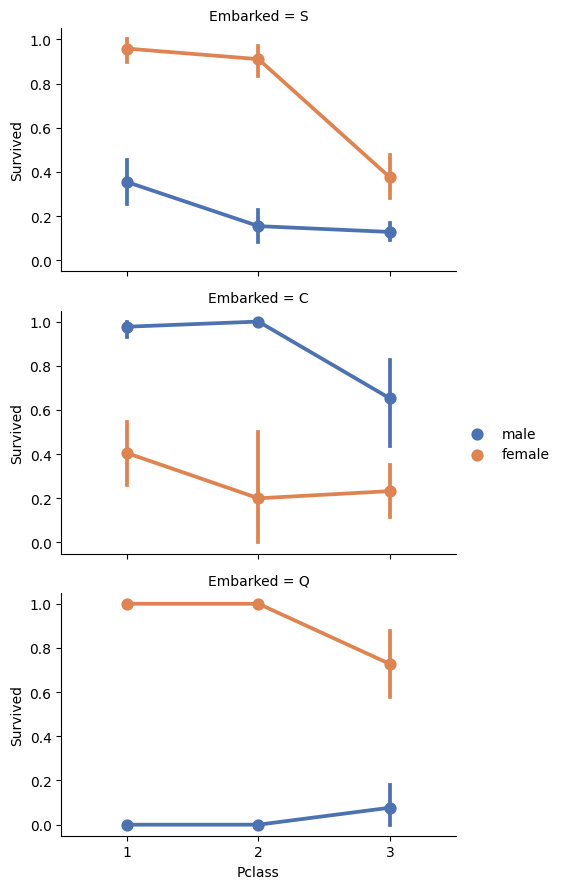

In [91]:
import warnings
warnings.filterwarnings('ignore')
grid = sns.FacetGrid(train, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

We can see that-  
* Female passengers had much better survival rate than males (except for Embarked=C where males had higher survival rate).
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

As a result, we consider 'Embarked' and 'Sex' feature in our model training.  

**5) Fare with Embarked and Sex**

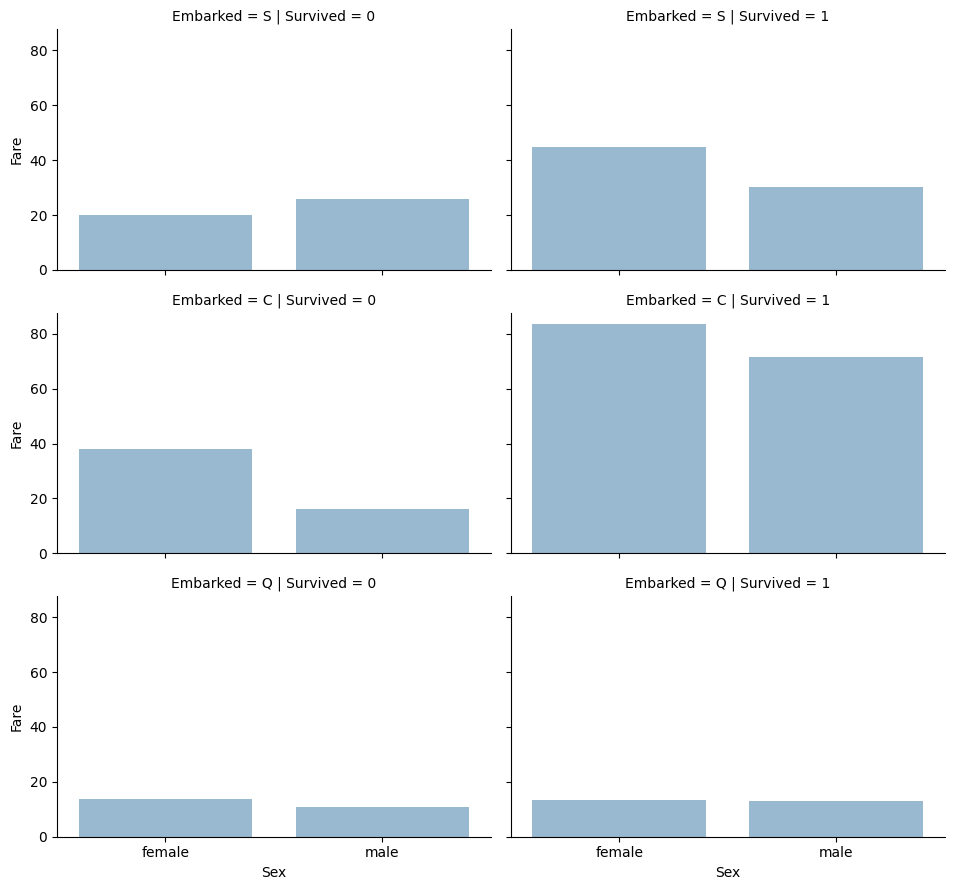

In [92]:
import warnings
warnings.filterwarnings('ignore')
grid = sns.FacetGrid(train, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

We can see that-  
* Higher fare paying passengers had better survival.
* Port of embarkation correlates with survival rates. 

As a result, we consider 'Fare' feature in our model training

We consider dropping the following features-
* Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* PassengerId may be dropped from training dataset as it does not contribute to survival.
* Name feature is relatively non-standard, and won't contribute to survival. So we drop it.

## Encoding of Categorical Variables

We do label encoding of 'Sex' feature by encoding female=1 and male=0.

In [20]:
gender = {'female': 1,'male': 0}
train.Sex = [gender[item] for item in train.Sex]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test.Sex = [gender[item] for item in test.Sex]
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


Next, we do one-hot-encoding of 'Embarked' feature.

In [22]:
one_hot_encoded_data=pd.get_dummies(train,columns=['Embarked'])
train=one_hot_encoded_data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1


In [23]:
one_hot_encoded_data=pd.get_dummies(test,columns=['Embarked'])
test=one_hot_encoded_data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,0,1


## Handling Null/Missing Values

We saw earlier that the variables Cabin, Age and Embarked contain null values. As we are using Age and Embarked features in our model training, so we fill these values with median.

In [24]:
#Checking what all columns have null values in training data
train.columns[train.isna().any()].tolist()

['Age', 'Cabin']

In [26]:
from sklearn.impute import SimpleImputer
import numpy as np
si=SimpleImputer(missing_values = np.nan, strategy="median")
si.fit(train[['Age']])
#Filling missing data with median
train[['Age']] = si.transform(train[['Age']])

In [27]:
# #Checking again what all columns have null values in training data
train.columns[train.isna().any()].tolist()

['Cabin']

In [25]:
#Checking what all columns have null values in test data
test.columns[test.isna().any()].tolist()

['Age', 'Fare', 'Cabin']

In [28]:
from sklearn.impute import SimpleImputer
import numpy as np
si=SimpleImputer(missing_values = np.nan, strategy="median")
si.fit(test[['Age']])
#Filling missing data with median
test[['Age']] = si.transform(test[['Age']])

In [30]:
from sklearn.impute import SimpleImputer
import numpy as np
si=SimpleImputer(missing_values = np.nan, strategy="median")
si.fit(test[['Fare']])
#Filling missing data with median
test[['Fare']] = si.transform(test[['Fare']])

In [31]:
#Checking again what all columns have null values in test data
test.columns[test.isna().any()].tolist()

['Cabin']

## Creating New Features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [32]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,1


In [33]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,0,1,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,0,1,0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,0,1,3


In [34]:
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone from the FamilySize feature.

In [35]:
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,1,1


In [36]:
test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0,1,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,0,1,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,0,1,0,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,0,1,3,0


In [37]:
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


We also create another feature which is the roduct of Pclass and Age.

In [38]:
train['Age*Class'] = train.Age * train.Pclass
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,2,0,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,2,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,1,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1,2,0,35.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,1,1,105.0


In [39]:
test['Age*Class'] = test.Age * test.Pclass
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0,1,0,1,1,103.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,0,1,2,0,141.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,0,1,0,1,1,124.0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0,1,1,1,81.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,0,1,3,0,66.0


## Forming Training Dataset

In [41]:
X_train=train[['Pclass','Sex','Age','Fare','Embarked_C','Embarked_Q','Embarked_S','FamilySize','IsAlone','Age*Class']]
X_train.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Age*Class
0,3,0,22.0,7.2500,0,0,1,2,0,66.0
1,1,1,38.0,71.2833,1,0,0,2,0,38.0
2,3,1,26.0,7.9250,0,0,1,1,1,78.0
3,1,1,35.0,53.1000,0,0,1,2,0,35.0
4,3,0,35.0,8.0500,0,0,1,1,1,105.0


In [42]:
Y_train=train['Survived']
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Applying Models

**1) Logistic Regression**

In [45]:
# Applying Logistic Regression Model with Hyperparameter Tuning and Cross-Validation
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.800225 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [49]:
# Evaluation Metrics
# Confuison Matrix, Precision, Recall and  F1 Score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
train_predictions=grid_result.predict(X_train)
print("Confusion Matrix:-")
print(confusion_matrix(Y_train,train_predictions))
print("\n")
print("Accuracy: ", accuracy_score(Y_train, train_predictions))
print("\n")
print("Classification Report:-")
print(classification_report(Y_train,train_predictions))
print("\n")
print("Overall Precision: ", precision_score(Y_train,train_predictions))
print("Overall Recall: ", recall_score(Y_train,train_predictions))
print("F1 Score: ", 2*precision_score(Y_train,train_predictions)*recall_score(Y_train,train_predictions)/(precision_score(Y_train,train_predictions)+recall_score(Y_train,train_predictions)))

Confusion Matrix:-
[[474  75]
 [102 240]]


Accuracy:  0.8013468013468014


Classification Report:-
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



Overall Precision:  0.7619047619047619
Overall Recall:  0.7017543859649122
F1 Score:  0.730593607305936


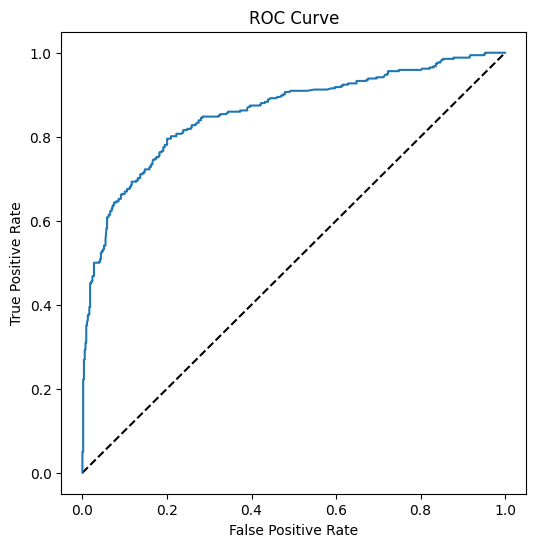

AUC score:  0.8584374567262114


In [47]:
# ROC curve and AUC score
probs=grid_result.predict_proba(X_train) #Probability of predicting each feature 0 and 1
fpr,tpr,thresholds=roc_curve(Y_train,probs[:,1])
fig=plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("AUC score: ",roc_auc_score(Y_train,probs[:,1]))

**2) Decision Tree**

To prevent overfitting, I use pre-punning which is a technique to remove the parts of the decision tree to prevent growing to its full depth. By tuning the hyperparameters of the decision tree model one can prune the trees and prevent them from overfitting.

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_train, Y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(Y_train, grid_cv.predict(X_train)))

Param for GS {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.8432077461413096
Train AUC ROC Score for GS:  0.8205109768957914


In [51]:
# Evaluation Metrics
# Confuison Matrix, Precision, Recall and  F1 Score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
train_predictions=grid_cv.predict(X_train)
print("Confusion Matrix:-")
print(confusion_matrix(Y_train,train_predictions))
print("\n")
print("Accuracy: ", accuracy_score(Y_train, train_predictions))
print("\n")
print("Classification Report:-")
print(classification_report(Y_train,train_predictions))
print("\n")
print("Overall Precision: ", precision_score(Y_train,train_predictions))
print("Overall Recall: ", recall_score(Y_train,train_predictions))
print("F1 Score: ", 2*precision_score(Y_train,train_predictions)*recall_score(Y_train,train_predictions)/(precision_score(Y_train,train_predictions)+recall_score(Y_train,train_predictions)))

Confusion Matrix:-
[[498  51]
 [ 91 251]]


Accuracy:  0.8406285072951739


Classification Report:-
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       549
           1       0.83      0.73      0.78       342

    accuracy                           0.84       891
   macro avg       0.84      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



Overall Precision:  0.8311258278145696
Overall Recall:  0.7339181286549707
F1 Score:  0.7795031055900622


**3) Random Forest**

In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, Y_train)
print("Best Parameters-")
print(rf_random.best_params_)
print("\n")
print("Accuracy: ", accuracy_score(Y_train, rf_random.predict(X_train)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters-
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


Accuracy:  0.8911335578002245


In [55]:
# Evaluation Metrics
# Confuison Matrix, Precision, Recall and  F1 Score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
train_predictions=rf_random.predict(X_train)
print("Confusion Matrix:-")
print(confusion_matrix(Y_train,train_predictions))
print("\n")
print("Accuracy: ", accuracy_score(Y_train, train_predictions))
print("\n")
print("Classification Report:-")
print(classification_report(Y_train,train_predictions))
print("\n")
print("Overall Precision: ", precision_score(Y_train,train_predictions))
print("Overall Recall: ", recall_score(Y_train,train_predictions))
print("F1 Score: ", 2*precision_score(Y_train,train_predictions)*recall_score(Y_train,train_predictions)/(precision_score(Y_train,train_predictions)+recall_score(Y_train,train_predictions)))

Confusion Matrix:-
[[521  28]
 [ 69 273]]


Accuracy:  0.8911335578002245


Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       549
           1       0.91      0.80      0.85       342

    accuracy                           0.89       891
   macro avg       0.90      0.87      0.88       891
weighted avg       0.89      0.89      0.89       891



Overall Precision:  0.9069767441860465
Overall Recall:  0.7982456140350878
F1 Score:  0.849144634525661


**4) Support Vector Machines**

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.612 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.618 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.618 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.618 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.612 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [57]:
from sklearn.metrics import accuracy_score
# print best parameter after tuning
print("Best Parameters-")
print(grid.best_params_)
print("\n")
print("Accuracy: ", accuracy_score(Y_train, grid.predict(X_train)))

Best Parameters-
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


Accuracy:  0.8294051627384961


In [58]:
# Evaluation Metrics
# Confuison Matrix, Precision, Recall and  F1 Score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
train_predictions=grid.predict(X_train)
print("Confusion Matrix:-")
print(confusion_matrix(Y_train,train_predictions))
print("\n")
print("Accuracy: ", accuracy_score(Y_train, train_predictions))
print("\n")
print("Classification Report:-")
print(classification_report(Y_train,train_predictions))
print("\n")
print("Overall Precision: ", precision_score(Y_train,train_predictions))
print("Overall Recall: ", recall_score(Y_train,train_predictions))
print("F1 Score: ", 2*precision_score(Y_train,train_predictions)*recall_score(Y_train,train_predictions)/(precision_score(Y_train,train_predictions)+recall_score(Y_train,train_predictions)))

Confusion Matrix:-
[[485  64]
 [ 88 254]]


Accuracy:  0.8294051627384961


Classification Report:-
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       549
           1       0.80      0.74      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



Overall Precision:  0.7987421383647799
Overall Recall:  0.7426900584795322
F1 Score:  0.7696969696969698


**5) Neural Networks**

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20,20,20), random_state=1)
clf.fit(X_train,Y_train)
print("Accuracy: ", accuracy_score(Y_train, clf.predict(X_train)))

Accuracy:  0.8249158249158249


In [66]:
# Evaluation Metrics
# Confuison Matrix, Precision, Recall and  F1 Score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
train_predictions=clf.predict(X_train)
print("Confusion Matrix:-")
print(confusion_matrix(Y_train,train_predictions))
print("\n")
print("Accuracy: ", accuracy_score(Y_train, train_predictions))
print("\n")
print("Classification Report:-")
print(classification_report(Y_train,train_predictions))
print("\n")
print("Overall Precision: ", precision_score(Y_train,train_predictions))
print("Overall Recall: ", recall_score(Y_train,train_predictions))
print("F1 Score: ", 2*precision_score(Y_train,train_predictions)*recall_score(Y_train,train_predictions)/(precision_score(Y_train,train_predictions)+recall_score(Y_train,train_predictions)))

Confusion Matrix:-
[[492  57]
 [ 99 243]]


Accuracy:  0.8249158249158249


Classification Report:-
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       549
           1       0.81      0.71      0.76       342

    accuracy                           0.82       891
   macro avg       0.82      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



Overall Precision:  0.81
Overall Recall:  0.7105263157894737
F1 Score:  0.7570093457943925


The following table summarizes the accuracy result of all the models.

In [76]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machines', 
          'Neural Networks'],
    'Accuracy': [accuracy_score(Y_train, grid_result.predict(X_train)),accuracy_score(Y_train, grid_cv.predict(X_train)),accuracy_score(Y_train, rf_random.predict(X_train)),accuracy_score(Y_train, grid.predict(X_train)) 
        , accuracy_score(Y_train, clf.predict(X_train))]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,0.891134
1,Decision Tree,0.840629
3,Support Vector Machines,0.829405
4,Neural Networks,0.824916
0,Logistic Regression,0.801347


We can see from the above results that Random Forest gives the best Accuracy. Moreover, it also gave the best F1 score. So we use Random Forest to make predictions on test data and make the submission on Kaggle.

## Making Predictions on Test Data

In [77]:
X_test=test[['Pclass','Sex','Age','Fare','Embarked_C','Embarked_Q','Embarked_S','FamilySize','IsAlone','Age*Class']]
X_test.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Age*Class
0,3,0,34.5,7.8292,0,1,0,1,1,103.5
1,3,1,47.0,7.0000,0,0,1,2,0,141.0
2,2,0,62.0,9.6875,0,1,0,1,1,124.0
3,3,0,27.0,8.6625,0,0,1,1,1,81.0
4,3,1,22.0,12.2875,0,0,1,3,0,66.0


In [78]:
prediction=rf_random.predict(X_test) # Random Forest Prediction
surv = pd.DataFrame(prediction)
passengerid=test['PassengerId']
submission = pd.DataFrame()
submission['PassengerId']=passengerid
submission['Survived']=prediction
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [82]:
submission.to_csv("Submission.csv",index="false") # converting sumbission dataframe to csv

In [83]:
from google.colab import files
files.download('Submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>